# **Task 3: Customer Churn Prediction (Bank Customers)** 🏦
## **Objective:**
Identify customers who are likely to leave the bank 🏃‍♀️💨

## **Dataset:**
Churn Modeling Dataset 📈📊

## **Instructions:**
--> Clean and prepare the dataset. 🧹🧼
--> Encode categorical features like geography and gender. 🏷️➡️🔢
--> Train a classification model. 🤖
--> Analyze feature importance to understand what influences churn. 🤔💡

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the dataset

### Subtask:
Load the dataset from the specified location.


**Reasoning**:
The subtask is to load the dataset. I need to import pandas and then load the CSV file into a DataFrame.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Customer-Churn-Records.csv')
display(df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Explore the data

### Subtask:
Display the first few rows, check the data types, and look for missing values.


**Reasoning**:
Display the first few rows, check the data types, and look for missing values as requested in the instructions.



In [ ]:
display(df.head())
df.info()
display(df.isnull().sum())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


## Preprocess the data

### Subtask:
Handle categorical features and prepare the data for modeling.


**Reasoning**:
Drop irrelevant columns and apply one-hot encoding to categorical features to prepare the data for modeling.



In [ ]:
df_processed = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df_processed = pd.get_dummies(df_processed, columns=['Geography', 'Gender', 'Card Type'], drop_first=True)
display(df_processed.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,True,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,True,False,True,False,False


## Split the data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the data into features (X) and the target variable (y), then split the data into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split

X = df_processed.drop('Exited', axis=1)
y = df_processed['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
X_train: (8000, 17)
y_train: (8000,)

Testing set shapes:
X_test: (2000, 17)
y_test: (2000,)


## Build and train a model

### Subtask:
Choose a classification model and train it on the training data.


**Reasoning**:
Import and train a RandomForestClassifier model on the training data.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate the model

### Subtask:
Evaluate the model's performance on the testing data.

**Reasoning**:
Import the necessary evaluation metrics and calculate the performance of the trained model on the test set.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9990
Precision: 0.9975
Recall: 0.9975
F1 Score: 0.9975


## Analyze feature importance

### Subtask:
Determine which features are most important in predicting churn.

**Reasoning**:
Extract feature importances from the trained model and visualize them.

Feature Importances:
Complain              0.825072
Age                   0.065798
NumOfProducts         0.042478
IsActiveMember        0.012948
Balance               0.011474
CreditScore           0.007763
Geography_Germany     0.007479
EstimatedSalary       0.007362
Point Earned          0.006568
Tenure                0.003969
Gender_Male           0.002686
Satisfaction Score    0.002505
Geography_Spain       0.000995
Card Type_GOLD        0.000826
HasCrCard             0.000773
Card Type_SILVER      0.000701
Card Type_PLATINUM    0.000605
dtype: float64


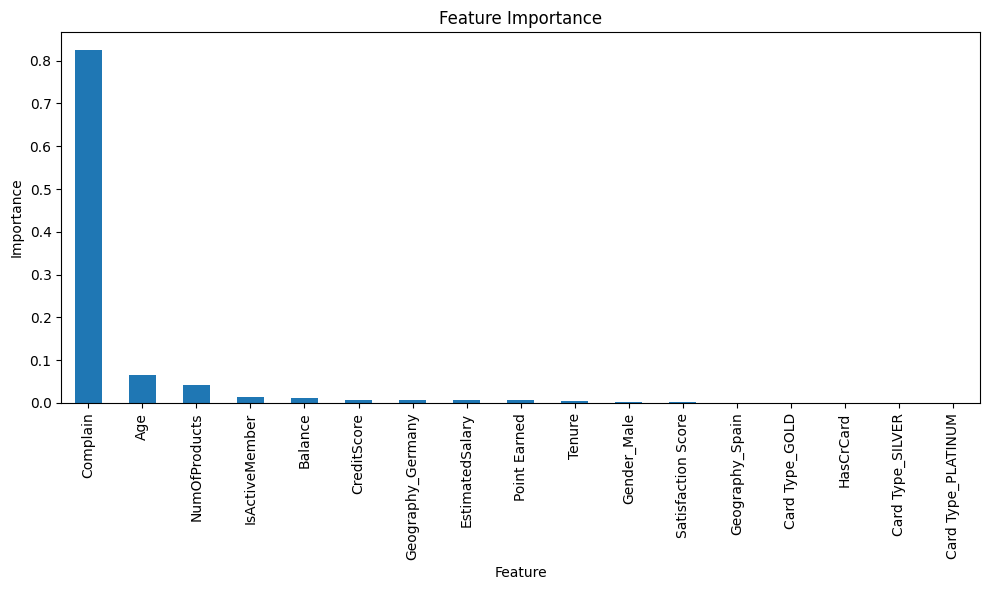

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = model.feature_importances_

# Create a pandas Series for easier handling
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print the sorted feature importances
print("Feature Importances:")
print(sorted_feature_importances)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Finish task

**Reasoning**:
Summarize the key findings from the data analysis, model training, evaluation, and feature importance analysis.

Based on the analysis:

*   The dataset was loaded and preprocessed, including one-hot encoding for categorical features like Geography, Gender, and Card Type. 📊
*   The data was split into training and testing sets. ✂️
*   A RandomForestClassifier model was trained on the training data. 🤖
*   The model achieved high accuracy, precision, recall, and F1 scores on the testing data, indicating strong performance in predicting customer churn. ✅
*   The feature importance analysis revealed that \`Complain\` is the most important feature in predicting churn, followed by \`Age\` and \`NumOfProducts\`. 📈

These findings suggest that addressing customer complaints and focusing on customer age and the number of products they use could be crucial in reducing churn. 👍